## Import Data

In [1]:
library(data.table)
data <- data.table(read.delim(file = "20170315_SCHBV_201606_09_1MLatency_3MChurn"))
head(data)

subscriber_key,report_period_m_cd,tenure_mobile,price_plan_age,priv_cust_seg_txt,usg_mv_ib_a_1m_sum,usg_md_ib_mb_1m_sum,usg_md_sms_ib_a_1m_sum,rev_mobile_act_revenue_1m_sum,rev_mobile_act_revenue_6m_avg,...,distinct_partner_omob_1m_sum,distinct_partner_00_1m_sum,distinct_partner_sp_1m_sum,top_partner_mk_6m_cnt,t_LV_Cnt,t_bobtarife_pay_per_use,t_act_rev_1m_GT_10_EUR,t_mit_ohne_GE_10EUR_ja_nein,t_Age,t_LVA_Cnt_GT0
200420271,201609,2519,532,NA,26.4333,23.4983,0,8.04,8.2667,...,5,10,2,2,a_0,0,0,d_mitGE_LE10EUR,d_51-65,0
206276753,201607,228,221,NA,0.0000,0.0000,0,0.00,0.0650,...,0,0,0,0,a_0,1,0,b_keinGE_LE10EUR,d_51-65,0
205985597,201607,1777,1740,NA,0.0000,0.0000,0,0.00,0.0000,...,0,0,0,0,a_0,1,0,b_keinGE_LE10EUR,e_65+,0
200481508,201609,2407,2395,NA,45.5833,0.0000,0,3.76,2.6683,...,2,10,3,6,a_0,1,0,b_keinGE_LE10EUR,d_51-65,0
200161375,201609,3084,3081,NA,0.0000,0.0000,1,0.06,0.2567,...,0,0,0,0,a_0,1,0,b_keinGE_LE10EUR,d_51-65,0
200287336,201607,2833,2791,NA,93.5167,0.0000,0,7.71,10.7217,...,1,37,13,6,a_0,1,0,b_keinGE_LE10EUR,d_51-65,0


In [2]:
repr_html.data.table <- function(obj, ...)
    if (data.table::shouldPrint(obj))
        NextMethod()

repr_latex.data.table <- function(obj, ...)
    if (data.table::shouldPrint(obj))
        NextMethod()    
        
repr_text.data.table <- function(obj, ...)
    if (data.table::shouldPrint(obj))
        NextMethod()         

In [3]:
library(ggplot2)
options(jupyter.plot_mimetypes = 'image/png') #shows plots within the notebook

library(repr)
options(repr.plot.width=6, repr.plot.height=5) # Change plot size to 6 x 5

## Structure of data

In [4]:
str(data)

Classes 'data.table' and 'data.frame':	1105691 obs. of  67 variables:
 $ subscriber_key               : int  200420271 206276753 205985597 200481508 200161375 200287336 206062862 200442070 200296390 200177607 ...
 $ report_period_m_cd           : int  201609 201607 201607 201609 201609 201607 201607 201609 201609 201607 ...
 $ tenure_mobile                : int  2519 228 1777 2407 3084 2833 2621 2468 2838 2956 ...
 $ price_plan_age               : int  532 221 1740 2395 3081 2791 89 1382 1465 2946 ...
 $ priv_cust_seg_txt            : logi  NA NA NA NA NA NA ...
 $ usg_mv_ib_a_1m_sum           : num  26.4 0 0 45.6 0 ...
 $ usg_md_ib_mb_1m_sum          : num  23.5 0 0 0 0 ...
 $ usg_md_sms_ib_a_1m_sum       : int  0 0 0 0 1 0 9 25 5 4 ...
 $ rev_mobile_act_revenue_1m_sum: num  8.04 0 0 3.76 0.06 7.71 18.4 9.67 9.67 8.55 ...
 $ rev_mobile_act_revenue_6m_avg: num  8.267 0.065 0 2.668 0.257 ...
 $ device_os_cd                 : Factor w/ 25 levels "","Android","Bada",..: 2 6 1 2 1 10 6 6 2

## Summary Statistics

In [5]:
summary(data)

 subscriber_key      report_period_m_cd tenure_mobile  price_plan_age
 Min.   :200000139   Min.   :201607     Min.   :   0   Min.   :  -1  
 1st Qu.:200275024   1st Qu.:201607     1st Qu.:1382   1st Qu.: 911  
 Median :200557170   Median :201607     Median :2145   Median :1710  
 Mean   :203027895   Mean   :201608     Mean   :2102   Mean   :1710  
 3rd Qu.:206046194   3rd Qu.:201609     3rd Qu.:2831   3rd Qu.:2473  
 Max.   :206295490   Max.   :201609     Max.   :3742   Max.   :3742  
                                                                     
 priv_cust_seg_txt usg_mv_ib_a_1m_sum usg_md_ib_mb_1m_sum
 Mode:logical      Min.   :   0.0     Min.   :     0.0   
 NA's:1105691      1st Qu.:   0.0     1st Qu.:     0.0   
                   Median :  40.8     Median :     0.0   
                   Mean   : 125.5     Mean   :   421.4   
                   3rd Qu.: 169.4     3rd Qu.:   230.2   
                   Max.   :4639.4     Max.   :112534.0   
                                  

## % of missing values per column

In [6]:
colMeans(is.na(data))

subscriber_key            report_period_m_cd 
                   0.00000000                    0.00000000 
                tenure_mobile                price_plan_age 
                   0.00000000                    0.00000000 
            priv_cust_seg_txt            usg_mv_ib_a_1m_sum 
                   1.00000000                    0.00000000 
          usg_md_ib_mb_1m_sum        usg_md_sms_ib_a_1m_sum 
                   0.00000000                    0.00000000 
rev_mobile_act_revenue_1m_sum rev_mobile_act_revenue_6m_avg 
                   0.00000000                    0.00000000 
                 device_os_cd               device_brand_cd 
                   0.00000000                    0.00000000 
            is_smart_phone_yn rev_mobile_act_revenue_3m_avg 
                   0.00000000                    0.00000000 
      distinct_partner_1m_sum                price_plan_txt 
                   0.00000000                    0.00000000 
      is_smartphone_tariff_yn                        Seg_Cd 
                   0.00000000                    0.00000000 
                          Age                     Gender_Cd 
                   0.00000000                    0.00000000 
                  province_cd         census_population_cnt 
                   0.00000000                    0.08180405 
         census_population_cd             no_data_usage_ind 
                   0.00000000                    0.00000000 
                   target_ind                        HV_Cnt 
                   0.00000000                    0.00000000 
                      HV_Days                        LV_Cnt 
                   0.00000000                    0.00000000 
                      LV_Days                        FX_CNT 
                   0.00000000                    0.00000000 
                      FX_Days                       LVA_Cnt 
                   0.00000000                    0.00000000 
                     LVA_Days                activation_dat 
                   0.00000000                    0.00000000 
                price_plan_cd     price_plan_activation_dat 
                   0.00000000                    0.00000000 
             used_handset_key                       sim_age 
                   0.00000000                    0.00000000 
          subscriber_inactive                      combi_cd 
                   0.00000000                    0.00000000 
                      adv_key         usg_mv_ib_a_a1_1m_sum 
                   0.00000000                    0.00000000 
       usg_mv_ib_a_bob_1m_sum    usg_mv_ib_a_omob_tm_1m_sum 
                   0.00000000                    0.00000000 
   usg_mv_ib_a_omob_tr_1m_sum    usg_mv_ib_a_omob_or_1m_sum 
                   0.00000000                    0.00000000 
   usg_mv_ib_a_omob_hu_1m_sum  usg_mv_ib_a_omob_rest_1m_sum 
                   0.00000000                    0.00000000 
  usg_mv_ib_a_national_1m_sum   usg_mv_ib_a_internat_1m_sum 
                   0.00000000                    0.00000000 
           usg_mv_ob_a_1m_sum            usg_mv_ob_p_1m_sum 
                   0.00000000                    0.00000000 
          usg_md_ob_mb_1m_sum            charge_usage_ratio 
                   0.00000000                    0.00000000 
   distinct_partner_A1_1m_sum   distinct_partner_bob_1m_sum 
                   0.00000000                    0.00000000 
  distinct_partner_rbm_1m_sum  distinct_partner_omob_1m_sum 
                   0.00000000                    0.00000000 
   distinct_partner_00_1m_sum    distinct_partner_sp_1m_sum 
                   0.00000000                    0.00000000 
        top_partner_mk_6m_cnt                      t_LV_Cnt 
                   0.00000000                    0.00000000 
      t_bobtarife_pay_per_use        t_act_rev_1m_GT_10_EUR 
                   0.00000000                    0.00000000 
  t_mit_ohne_GE_10EUR_ja_nein                         t_Age 
                   0.00000000                    0

In [7]:
data[,priv_cust_seg_txt:= NULL]
data[,activation_dat:=NULL]
data[,price_plan_activation_dat:=NULL]

## Data Cleaning

In [8]:
summary(data$device_os_cd)
data$device_os <- ifelse(as.character(data$device_os_cd) == "","NULL",as.character(data$device_os_cd))
os <- c("Android","iOS","prop","S40","NULL")
data$device_os <- factor(ifelse(!(data$device_os %in% os),"OTHER",data$device_os))

Android          Bada            BB Blackberry 10 
       345398        337123          1703          1600           770 
          iOS         MAEMO          prop           S30           S40 
        99893            71        195134          7351         90454 
          S60     S60 Touch           S80  Symbian Anna Symbian Belle 
         5725          1917           111            76           108 
    Symbian^3           UIQ    Windows 10   Windows 6.5     Windows 7 
         1263           107          2033             2            83 
  Windows 7.5     Windows 8         WinMo           WP7           WP8 
          220         10517           576           963          2493

In [9]:
summary(data$device_os)
data[,device_os_cd:=NULL]

Android     iOS    NULL   OTHER    prop     S40 
 337123   99893  345398   37689  195134   90454

In [10]:
summary(data$device_brand_cd)
data$device_brand <- ifelse(as.character(data$device_brand_cd) == "","NULL",as.character(data$device_brand_cd))
brands <- c("Samsung","Nokia","Apple","NULL")
data$device_brand <- factor(ifelse(!(data$device_brand %in% brands),"OTHER",data$device_brand))

Samsung 
                                           318406 
                                                  
                                           242076 
                                            Nokia 
                                           151931 
                                            Apple 
                                            99893 
                                          Emporia 
                                            44841 
                                   LG Electronics 
                                            37409 
                                            Telit 
                                            24449 
                                             SONY 
                                            23488 
                                           Huawei 
                                            18441 
                                    Sony Ericsson 
                                            17667 
                                              HTC 
                                            13935 
                       Cinterion Wireless Modules 
                                            11121 
                                          Siemens 
                                             9175 
                                         Motorola 
                                             7992 
                                        Microsoft 
                                             6384 
                                          Doro AB 
                                             5404 
                                          Alcatel 
                                             5283 
                                           Enfora 
                                             5253 
                                           Tel.me 
                                             4875 
                                        Jablotron 
                                             4571 
                         CK Telecom (Heyuan) Inc. 
                                             4215 
                                         One Comm 
                                             3895 
                                           Simcom 
                                             3329 
                                           Beafon 
                                             3188 
                                          Wavecom 
                                             3147 
                                      Simcom Ltd. 
                                             2512 
                                              RIM 
                                             2305 
                                CHN International 
                                             2271 
                                              ZTE 
                                             2155 
                                          Newplan 
                                             1855 
                                              CAT 
                                             1714 
                                         SagemCom 
                                             1401 
                                             Avus 
                                             1195 
                           Beijing Capitel Co Ltd 
                                             1112 
                                            Sagem 
                                             1099 
                                       TCT Mobile 
                                             1026 
                                           Archos 
                                             1002 
                                        unbekannt 
                                              987 
                                         Shenzhen 
                                              944 
                                         Ericsson 
             

In [11]:
summary(data$device_brand)
data[,device_brand_cd:=NULL]

Apple   Nokia    NULL   OTHER Samsung 
  99893  151931  242076  293385  318406

In [12]:
data$Seg <- ifelse(as.character(data$Seg_Cd) == "RES","RES","OTHER")
data$Seg <- factor(data$Seg)
data[,Seg_Cd:=NULL]
summary(data$Seg)

OTHER     RES 
  74364 1031327

In [13]:
data[,.(count = .N, churn_rate = mean(target_ind)),by=Gender_Cd]

Gender_Cd,count,churn_rate
F,520871,0.022752275
M,584226,0.020011092
,594,0.003367003


In [14]:
data$Gender <- ifelse(as.character(data$Gender_Cd) == "","M",as.character(data$Gender_Cd))
data$Gender <- as.factor(data$Gender)
data[,Gender_Cd:=NULL]

In [15]:
data[,.(count = .N, churn_rate = mean(target_ind)),by=province_cd]

province_cd,count,churn_rate
NÃ–,290732,0.01957129
V,44137,0.02145592
T,70969,0.02274232
OÃ–,199176,0.02250773
W,240332,0.02264368
K,48562,0.02116882
St,119479,0.02005373
S,42778,0.02162326
B,40113,0.01949493
,9413,0.02517795


In [16]:
data$province <- ifelse(as.character(data$province_cd) == "","NULL",as.character(data$province_cd))
data$province <- as.factor(data$province)
data[,province_cd:=NULL]

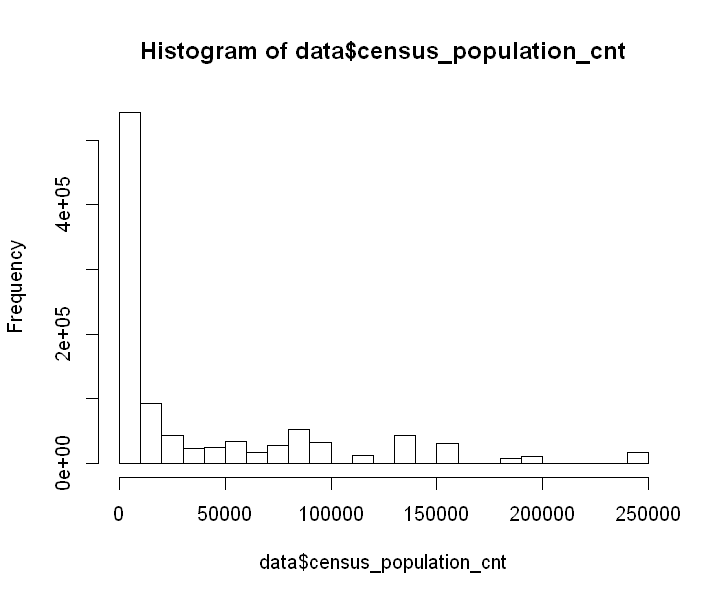

In [17]:
hist(data$census_population_cnt)

In [18]:
census_cnt_repl <- with(data, round(mean(census_population_cnt[as.character(census_population_cd) == "bis zu 2.000 EW"],na.rm=TRUE)))
census_cnt_repl
data[is.na(census_population_cnt),.N,by=census_population_cd]

[1] 1404

census_population_cd,N
bis zu 2.000 EW,63286
,27164


In [19]:
data$census_population_cnt[is.na(data$census_population_cnt)] <- census_cnt_repl

## Identify and remove features with zero variance (i.e. constants)

In [20]:
var0 <- unlist(lapply(data, function(x) 0 == var(if (is.factor(x)) as.integer(x) else x)))
remove <- names(var0[var0 == TRUE])
remove

[1] "no_data_usage_ind"

In [21]:
data[,no_data_usage_ind:=NULL]

In [22]:
table(data$HV_Cnt)


      0       1       2       3       4       5       6       7       8       9 
1098141    5941    1206     269      77      32      14       3       2       2 
     11      13 
      2       2 

In [23]:
summary(data$combi_cd)
data[,combi_cd:=NULL]

Unknown UNKNOWN 
 598022  507669

In [24]:
table(data$adv_key)
data$adv_key <- factor(ifelse(data$adv_key > 0 & data$adv_key < 7,1,data$adv_key))


     0      1      2      3      7 
399556   2936      2     44 703153 

In [25]:
data[,t_LV_Cnt:=NULL]

## Convert target_ind to factor variable

In [26]:
data$target_ind <- factor(data$target_ind)

## Sample non-churners (8:1 ratio of non-churners:churners)

In [27]:
train <- data[data$report_period_m_cd == 201607]
prediction <- data[data$report_period_m_cd == 201609]

churners <- train[train$target_ind == "1",]
non_churners <- train[train$target_ind == "0",]
set.seed(1)
non_churn_samp <- non_churners[sample(nrow(non_churners),nrow(churners)*8,replace = FALSE),]
train <- rbind(churners,non_churn_samp)

rm(churners);rm(non_churners);rm(non_churn_samp)

In [28]:
print(dim(train))
print(dim(prediction))

[1] 96885    61
[1] 551212     61


## Run Model

In [29]:
library(randomForest)
set.seed(123)
bob_churn.rf <- randomForest(target_ind ~ . -subscriber_key-report_period_m_cd, data = train, ntree = 200)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin



In [30]:
bob_churn.rf


Call:
 randomForest(formula = target_ind ~ . - subscriber_key - report_period_m_cd,      data = train, ntree = 200) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 7

        OOB estimate of  error rate: 9.84%
Confusion matrix:
      0    1 class.error
0 85944  176  0.00204366
1  9362 1403  0.86967023

## Generate Predictions

In [31]:
rf.pred <- predict(bob_churn.rf, prediction, type = 'prob')

In [33]:
library(dplyr)
rf.results <- data.frame(prediction[,c("subscriber_key","target_ind"),with=FALSE], data.frame(rf.pred)["X1"])
output <- rf.results %>% mutate(PERCENTILE = ntile(X1, 100))

In [34]:
library(plyr)
output <- plyr::rename(output, c("X1"="SCORE"))
output <- output[with(output, order(-SCORE)),]
output <- data.table(output)

------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: 'plyr'

The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize



## Evaluate predictions for Top 10% scores

In [37]:
bg_churn <- mean(as.numeric(as.character(output$target_ind)))
top10 <- output[,.(.N,sum(as.numeric(as.character(target_ind)))),by=PERCENTILE][1:10]
top10$cum_subs <- cumsum(top10$N)
top10$cum_churners <- cumsum(top10$V2)
top10$cum_lift <- (top10$cum_churners/top10$cum_subs)/bg_churn
top10[,N:=NULL]
top10[,V2:=NULL]
top10

PERCENTILE,cum_subs,cum_churners,cum_lift
100,5512,891,6.972528
99,11024,1458,5.704796
98,16536,1887,4.922245
97,22048,2286,4.472278
96,27560,2634,4.122478
95,33072,2992,3.902320
94,38584,3319,3.710409
93,44096,3628,3.548868
92,49609,3911,3.400550
91,55121,4193,3.281176


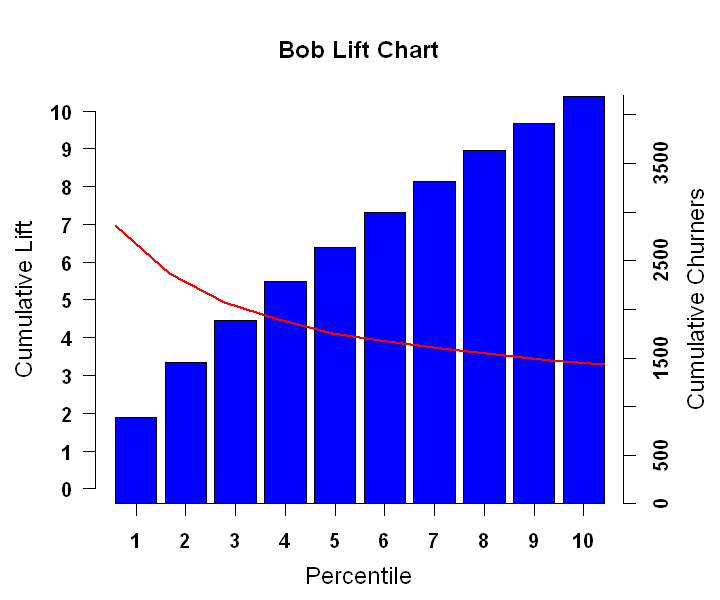

In [38]:
par(mar = rep(4, 4))
y <- lineData <- top10$cum_lift;
x <- barplot(top10$cum_churners, 
             axes = FALSE,
             col = "blue", 
             ylim = c(0, max(top10$cum_churners)) )[, 1]
axis(1, at = x, labels = c(1:10), font=2)
axis(4, at = seq(0, 6000, 500), font=2)
par(new = TRUE)
plot(x = x, y = y, type = "l", col = "red", lwd=2, axes = FALSE, xlab = "", ylab = "", ylim=c(0,10))
axis(2, at = c(0:10), las = 2, font=2) 
title(main="Bob Lift Chart", mgp=c(2,1,0),cex.lab=2)
title(ylab="Cumulative Lift", mgp=c(2.5,1,0),cex.lab=1.2)
title(xlab="Percentile", mgp=c(2.5,1,0),cex.lab=1.2)
mtext(text="Cumulative Churners", side = 4, line = 2.5,cex=1.2)

## Top 20 Variables

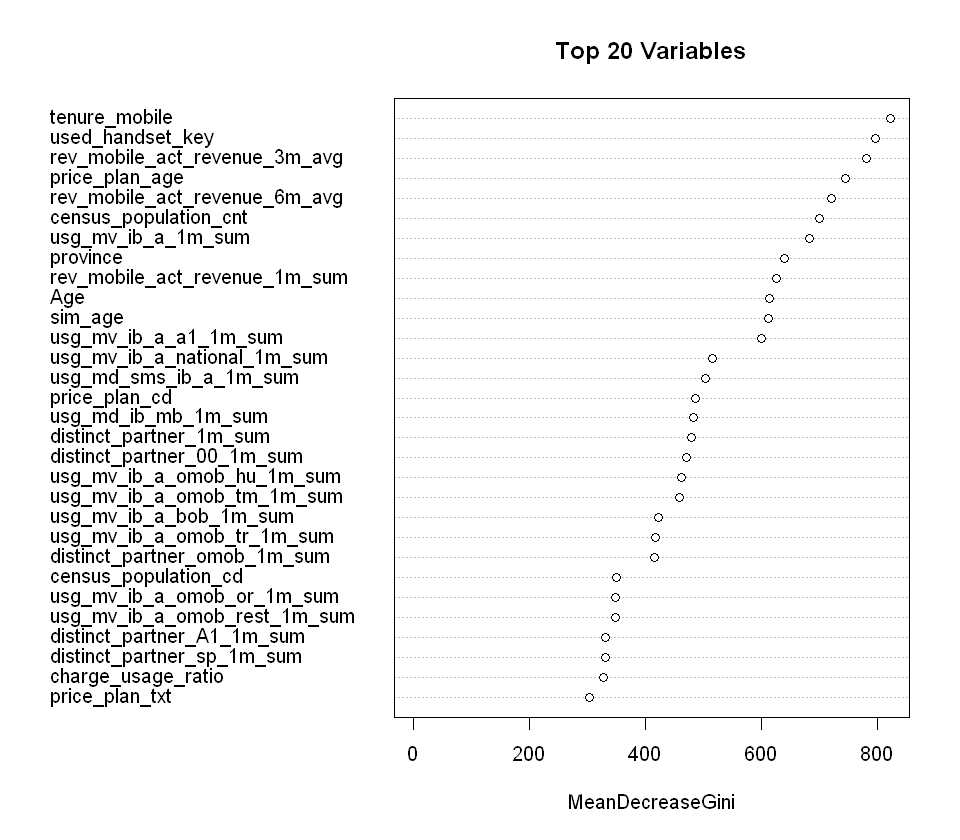

In [39]:
options(repr.plot.width=8, repr.plot.height=7)
varImpPlot(bob_churn.rf,main="Top 20 Variables")
options(repr.plot.width=6, repr.plot.height=5)

## Price Plan Distribution

In [79]:
price_plan_splt <- prediction[,.(count=.N, churn_rate = mean(as.numeric(as.character(target_ind)))),by=price_plan_txt][order(-churn_rate)]
price_plan_splt

price_plan_txt,count,churn_rate
bob tÃ¼rkei,1490,0.069798658
bob deutschland,3848,0.047037422
bob Deutschland,2366,0.046491970
bob balkan,1887,0.046104928
superbob LTE,29083,0.041329987
smartbob XL,3809,0.041218167
big bob,87472,0.040310042
"smartbob XL 19,90 2013",2366,0.040152156
"smartbob XL 9,90",42232,0.040040727
smartbob,27684,0.039914752


In [81]:
prediction[,.(count=.N, churn_rate = mean(as.numeric(as.character(target_ind)))),by=t_bobtarife_pay_per_use]

t_bobtarife_pay_per_use,count,churn_rate
0,273472,0.038095308
1,277740,0.008500756
